<a href="https://colab.research.google.com/github/jasmitamukherjee/google-IT-automation/blob/main/datawarehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


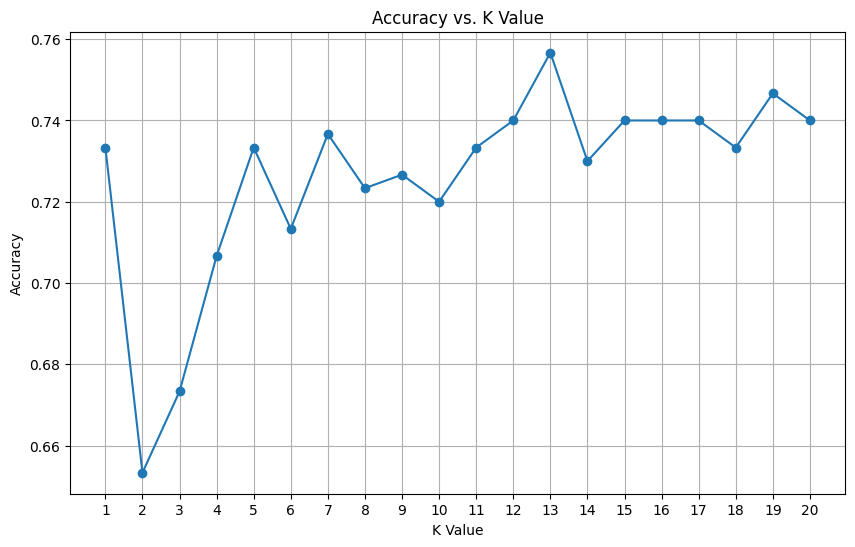

Accuracy: [0.7333333333333333, 0.6533333333333333, 0.6733333333333333, 0.7066666666666667, 0.7333333333333333, 0.7133333333333334, 0.7366666666666667, 0.7233333333333334, 0.7266666666666667, 0.72, 0.7333333333333333, 0.74, 0.7566666666666667, 0.73, 0.74, 0.74, 0.74, 0.7333333333333333, 0.7466666666666667, 0.74]


In [41]:


#KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Read the dataset
data = pd.read_csv("knn.csv")
# Split the dataset into features (X) and target (y)
X = data.drop('income', axis=1)
y = data['custcat']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=20)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define range of K values to try
k_values = range(1, 21) # Let's try K from 1 to 20
# Initialize an empty list to store accuracy values
accuracies = []
# Iterate over each value of K
for k in k_values:
# Train the K-NN classifier
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  # Make predictions on the test set
  y_pred = knn.predict(X_test_scaled)
  # Calculate accuracy and append to the list
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
# Plot the accuracy values against different values of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
# Print the accuracy of the classifier
print("Accuracy:", accuracies)

In [35]:
#A-priori
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


df = pd.read_excel("apriori.xlsx")

transactions = df.groupby('InvoiceNo')['Description'].apply(list)
transactions_list = transactions.tolist()


transactions_list = [transaction for transaction in transactions_list if all(isinstance(item, str) for item in transaction)]


te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.03)


print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
     support                                           itemsets
0   0.039313                           (6 RIBBONS RUSTIC CHARM)
1   0.034199                      (60 TEATIME FAIRY CAKE CASES)
2   0.040949                       (ALARM CLOCK BAKELIKE GREEN)
3   0.032686                        (ALARM CLOCK BAKELIKE PINK)
4   0.044222                        (ALARM CLOCK BAKELIKE RED )
..       ...                                                ...
81  0.040376                      (WOODEN FRAME ANTIQUE WHITE )
82  0.045735                (WOODEN PICTURE FRAME WHITE FINISH)
83  0.034486                           (WOODLAND CHARLOTTE BAG)
84  0.032072  (ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...
85  0.034076  (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...

[86 rows x 2 columns]

Association Rules:
                          antecedents                         consequents  \
0  (ROSES REGENCY TEACUP AND SAUCER )   (GREEN REGENCY TEACUP AND SAUCER)   
1   (GREEN REGEN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.8189169822909202
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.87      0.88      7479
        >50K       0.61      0.64      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.82      0.82      0.82      9769

Confusion Matrix:
[[6540  939]
 [ 830 1460]]


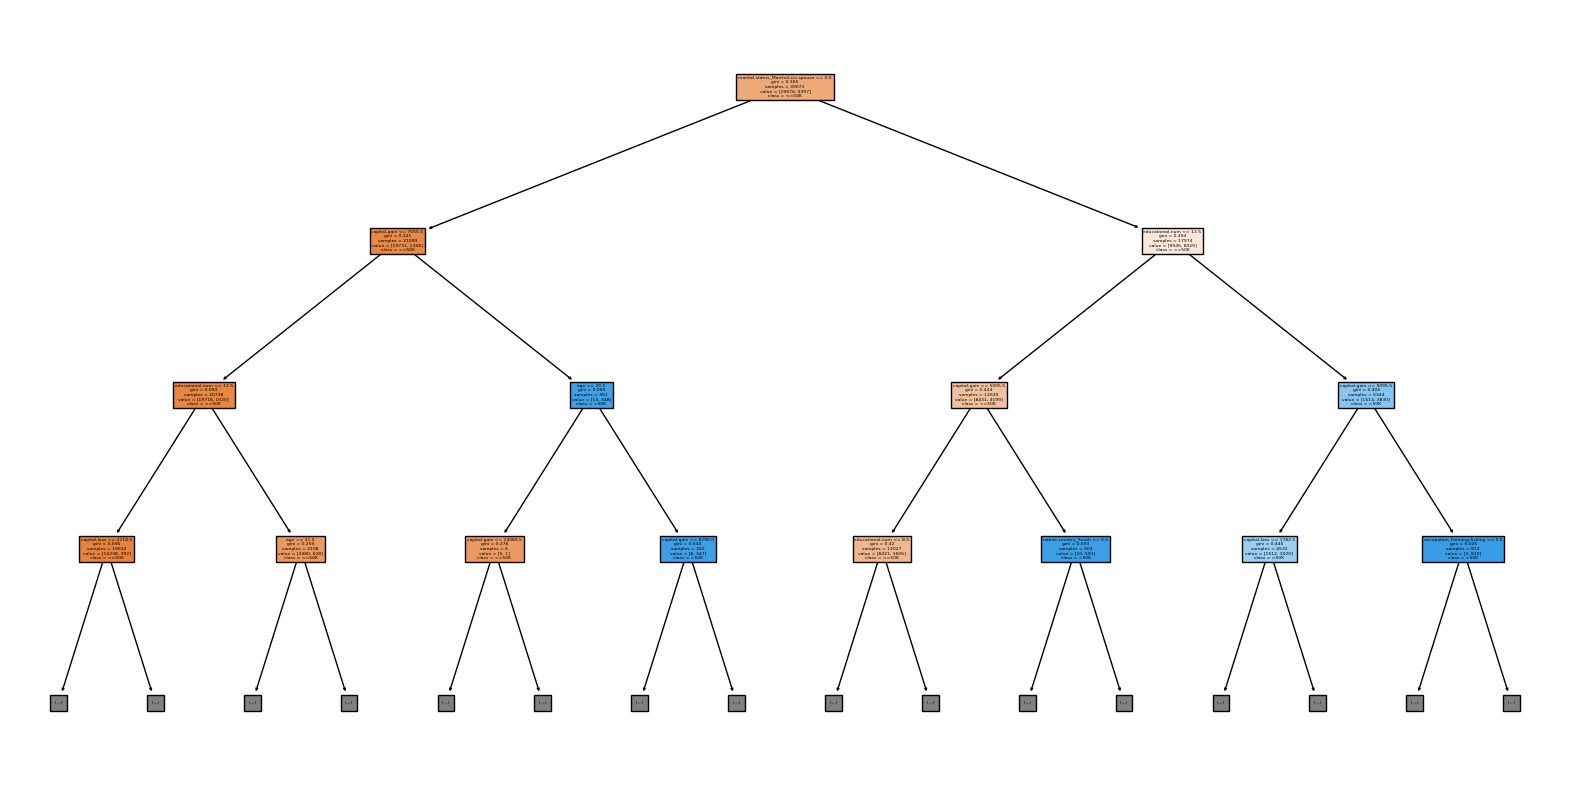

In [36]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = "decisiontree.csv"
df = pd.read_csv(file_path)
# Split dataset into features (X) and target variable (y)
X = df.drop(columns=['income'])
y = df['income']
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# One-hot encode categorical variables for both training and testing data
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
# Ensure that the columns in the test set match the columns in the training set
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
  X_test_encoded[col] = 0
# Reorder the columns in the test set to match the order in the training set
X_test_encoded = X_test_encoded[X_train_encoded.columns]
# Create a decision tree classifier object
clf = DecisionTreeClassifier()
# Fit the classifier with training data
clf.fit(X_train_encoded, y_train)
# Predict using the classifier
y_pred = clf.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Now try to visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train_encoded.columns, class_names=['<=50K',
'>50K'], max_depth=3)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


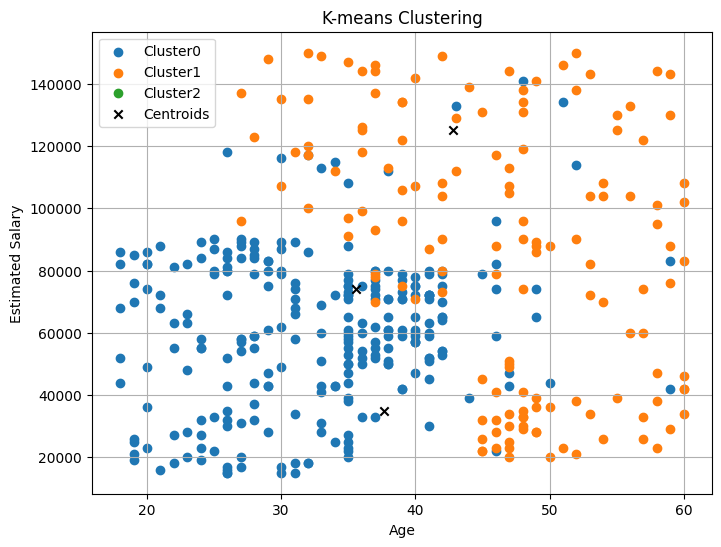

In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Load the dataset from CSV file
df = pd.read_csv('kmeans.csv')
df.head(5)
# Select features for clustering

X = df[['Age',
'EstimatedSalary']].values # Number of clusters
k = 3

# KMeans model
kmeans = KMeans(n_clusters=k)

# Fitting the model to the data
kmeans.fit(X)
# Visualize the clusters
plt.figure(figsize=(8,6))

# Plot each cluster
for cluster_label in range(k):
  cluster_data = df[df['Purchased'] == cluster_label]
  plt.scatter(cluster_data['Age'], cluster_data['EstimatedSalary'], label=f'Cluster{cluster_label}')

# Plot cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.grid(True)
plt.show()

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
# Assume your dataset is stored in a CSV file named 'adult.csv'
df = pd.read_csv('nb.csv')

# One-hot encode categorical features
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
df = pd.get_dummies(df, columns=categorical_cols)

# Separate features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.8000409472462977
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     11233
        >50K       0.65      0.31      0.42      3420

    accuracy                           0.80     14653
   macro avg       0.73      0.63      0.65     14653
weighted avg       0.78      0.80      0.77     14653



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No of clusters: 14


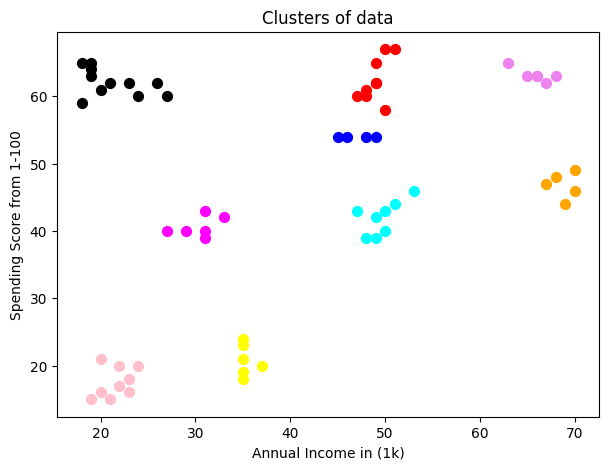

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Mall_Customers.csv")
df.head()
df.info()
df.describe()
x=df.iloc[:,[2,3]].values
x.shape
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

model=db.fit(x)
label=model.labels_
from sklearn import metrics
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True #Calculating the number of clusters
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)
y_means =db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')

plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()